# Aviation Data Project.

## Problem Statement

 The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Source

The dataset sourec is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Data Exploring and Objective
The analysis should yield three concrete business recommendations.




In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/Aviation_Data.csv', low_memory=False)

# Display basic information and the first few rows
print(df.head())
print(df.info())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

### Data Cleaning

We had to clean it our raw data so our analysis is accurate and reliable.
The following data points will be cleaning.

- Fill in Missing Injury Numbers. If it's blank, it usually means there were no injuries. So, we'll fill those blanks with 0.
  - Total.Fatal.Injuries
  - Total.Serious.Injuries
  - Total.Minor.Injuries
  
    
- Handle Missing Aircraft Damage. If we don't know what kind of damage occurred, we'll just say 'Unknown'

- Handle all Missing Purpose of Flight
- Remove Rows Without Make or Model Info.
- Make Damage Descriptions Consistent

In [9]:
# If there is a missing value under injury numbers, it has been replaced with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
print(df['Total.Fatal.Injuries'].info())
print(df['Total.Serious.Injuries'].info())
print(df['Total.Minor.Injuries'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Total.Fatal.Injuries
Non-Null Count  Dtype  
--------------  -----  
90348 non-null  float64
dtypes: float64(1)
memory usage: 706.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Total.Serious.Injuries
Non-Null Count  Dtype  
--------------  -----  
90348 non-null  float64
dtypes: float64(1)
memory usage: 706.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Total.Minor.Injuries
Non-Null Count  Dtype  
--------------  -----  
90348 non-null  float64
dtypes: float64(1)
memory usage: 706.0 KB
None


In [95]:
# If 'Aircraft.damage', 'Purpose of Flight' and 'Broad Phase of Flight' is missing it has been replaced with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
print(df['Aircraft.damage'].value_counts().head())
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.title()
print(df['Aircraft.damage'].info())
print(df['Purpose.of.flight']. info())

Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         4772
Minor           2805
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Aircraft.damage
Non-Null Count  Dtype 
--------------  ----- 
90348 non-null  object
dtypes: object(1)
memory usage: 706.0+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Purpose.of.flight
Non-Null Count  Dtype 
--------------  ----- 
90348 non-null  object
dtypes: object(1)
memory usage: 706.0+ KB
None


In [13]:
# Dropped all missing values the two columns "Model' and 'Make' and replaced with True
# 1570 rows were dropped and only 88777 remain
df.dropna(subset=['Make', 'Model'], inplace=True)
print(df['Make'].info())
print(df['Model'].info())
    

<class 'pandas.core.series.Series'>
Index: 88777 entries, 0 to 90347
Series name: Make
Non-Null Count  Dtype 
--------------  ----- 
88777 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.series.Series'>
Index: 88777 entries, 0 to 90347
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
88777 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB
None


In [105]:
# Convert all aircraft damage into Titles
df['Aircraft.damage'] = df['Aircraft.damage'].str.title()
print(df['Aircraft.damage'].info())
print(df['Aircraft.damage'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 90348 entries, 0 to 90347
Series name: Aircraft.damage
Non-Null Count  Dtype 
--------------  ----- 
90348 non-null  object
dtypes: object(1)
memory usage: 706.0+ KB
None
Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         4772
Minor           2805
Name: count, dtype: int64


### Combine all Make and Model Aircraft to define incIdents for each category and count each incidents

In [80]:
# grouped all rows that have the same Make AND Model together and count total incidents
incident_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Total_Incidents')
print(incident_counts.head())

                       Make              Model  Total_Incidents
0  107.5 Flying Corporation  One Design DR 107                1
1                      1200               G103                1
2                 177MF LLC     PITTS MODEL 12                1
3          1977 Colfer-chan      STEEN SKYBOLT                1
4                1st Ftr Gp     FOCKE-WULF 190                1


In [106]:
# Perfoming multiple calculations for each injuries type 
injury_counts = df.groupby(['Make', 'Model']).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum')
).reset_index()
print(injury_counts.head())

                       Make              Model  Total_Fatal_Injuries  \
0  107.5 Flying Corporation  One Design DR 107                   1.0   
1                      1200               G103                   0.0   
2                 177MF LLC     PITTS MODEL 12                   0.0   
3          1977 Colfer-chan      STEEN SKYBOLT                   0.0   
4                1st Ftr Gp     FOCKE-WULF 190                   1.0   

   Total_Serious_Injuries  Total_Minor_Injuries  
0                     0.0                   0.0  
1                     1.0                   0.0  
2                     2.0                   0.0  
3                     0.0                   1.0  
4                     0.0                   0.0  


### Combining the different occurance

-Incidents counts and injury counts 

In [65]:
#Align the date frames to have Make and Model in similar index
incident_for_concat = incident_counts.set_index(['Make', 'Model'])
injury_for_concat = injury_counts.set_index(['Make', 'Model'])

# Used concat to combined the data frames
aircraft_risk = pd.concat([incident_for_concat, injury_for_concat], axis=1).reset_index()

print(aircraft_risk.head())

                       Make              Model  Total_Incidents  \
0  107.5 Flying Corporation  One Design DR 107                1   
1                      1200               G103                1   
2                 177MF LLC     PITTS MODEL 12                1   
3          1977 Colfer-chan      STEEN SKYBOLT                1   
4                1st Ftr Gp     FOCKE-WULF 190                1   

   Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  
0                   1.0                     0.0                   0.0  
1                   0.0                     1.0                   0.0  
2                   0.0                     2.0                   0.0  
3                   0.0                     0.0                   1.0  
4                   1.0                     0.0                   0.0  


Dividing the total injuries by total incidents for each type of injury

In [107]:
#  total injuries divided the total incidents for each type of injury.
aircraft_risk['Fatal_Per_Incident'] = aircraft_risk['Total_Fatal_Injuries'] / aircraft_risk['Total_Incidents']
aircraft_risk['Serious_Per_Incident'] = aircraft_risk['Total_Serious_Injuries'] / aircraft_risk['Total_Incidents']
aircraft_risk['Minor_Per_Incident'] = aircraft_risk['Total_Minor_Injuries'] / aircraft_risk['Total_Incidents']

print(aircraft_risk.head())

                       Make              Model  Total_Incidents  \
0  107.5 Flying Corporation  One Design DR 107                1   
1                      1200               G103                1   
2                 177MF LLC     PITTS MODEL 12                1   
3          1977 Colfer-chan      STEEN SKYBOLT                1   
4                1st Ftr Gp     FOCKE-WULF 190                1   

   Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  \
0                   1.0                     0.0                   0.0   
1                   0.0                     1.0                   0.0   
2                   0.0                     2.0                   0.0   
3                   0.0                     0.0                   1.0   
4                   1.0                     0.0                   0.0   

   Fatal_Per_Incident  Serious_Per_Incident  Minor_Per_Incident  Risk_Score  
0                 1.0                   0.0                 0.0         5.0  
1 

Since the different units have different severinty, We added weightage of fatality to provide additinal contect on the decision
This is to provide a measure of risk score indictator

In [108]:
# These are our "weights". You can change these numbers if you think
WEIGHT_FATAL = 5   # Fatal injuries are 5 times more important
WEIGHT_SERIOUS = 3  # Serious injuries are 3 times more important
WEIGHT_MINOR = 1  # Minor injuries are 1 time important

 Now, we get Risk indicator by mutiplying the incident rate by the weight to and add them all to define  for each flight


In [109]:

aircraft_risk['Risk_Score'] = (
    aircraft_risk['Fatal_Per_Incident'] * WEIGHT_FATAL +
    aircraft_risk['Serious_Per_Incident'] * WEIGHT_SERIOUS +
    aircraft_risk['Minor_Per_Incident'] * WEIGHT_MINOR
)

print("\n--- Aircraft Risk Data with the new Risk Score (first 5 examples) ---")
print(aircraft_risk.head())


--- Aircraft Risk Data with the new Risk Score (first 5 examples) ---
                       Make              Model  Total_Incidents  \
0  107.5 Flying Corporation  One Design DR 107                1   
1                      1200               G103                1   
2                 177MF LLC     PITTS MODEL 12                1   
3          1977 Colfer-chan      STEEN SKYBOLT                1   
4                1st Ftr Gp     FOCKE-WULF 190                1   

   Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  \
0                   1.0                     0.0                   0.0   
1                   0.0                     1.0                   0.0   
2                   0.0                     2.0                   0.0   
3                   0.0                     0.0                   1.0   
4                   1.0                     0.0                   0.0   

   Fatal_Per_Incident  Serious_Per_Incident  Minor_Per_Incident  Risk_Score  
0        

In [110]:
 #We set a minimum number of incidents.
# If an aircraft has fewer than this, we won't include it in our "lowest risk" list.
MIN_INCIDENTS_THRESHOLD = 20

# This line creates a new table called 'filtered_aircraft_risk'
# that only includes rows where 'Total_Incidents' is 10 or more.
filtered_aircraft_risk = aircraft_risk[aircraft_risk['Total_Incidents'] >= MIN_INCIDENTS_THRESHOLD]

print(f"\n--- Aircraft models with at least {MIN_INCIDENTS_THRESHOLD} incidents ---")
print(f"We now have {len(filtered_aircraft_risk)} aircraft models to consider.")
print(filtered_aircraft_risk.head())


--- Aircraft models with at least 20 incidents ---
We now have 661 aircraft models to consider.
                Make    Model  Total_Incidents  Total_Fatal_Injuries  \
91           AERONCA     11AC               23                   4.0   
100          AERONCA      7AC               63                  12.0   
260  AIR TRACTOR INC   AT-301               27                   2.0   
272  AIR TRACTOR INC  AT-502B               25                   2.0   
273  AIR TRACTOR INC   AT-602               26                   7.0   

     Total_Serious_Injuries  Total_Minor_Injuries  Fatal_Per_Incident  \
91                      7.0                   3.0            0.173913   
100                    17.0                   6.0            0.190476   
260                     6.0                   0.0            0.074074   
272                     3.0                   3.0            0.080000   
273                     6.0                   1.0            0.269231   

     Serious_Per_Incident  Mino

We set a minimum number of incidents accepatable  


In [72]:
MIN_INCIDENTS_THRESHOLD = 10


Get the First 10 Lowest Risk flights


In [117]:
# The first 20 rows (the lowest risk ones).
lowest_risk_aircraft = filtered_aircraft_risk.sort_values(by='Risk_Score').head(10)

print("\n--- Top 30 Lowest Risk Aircraft Models ---")
print("These are the aircraft models with the lowest calculated risk scores,")
print(lowest_risk_aircraft.to_string(index=False))
print(lowest_risk_aircraft.head())


--- Top 30 Lowest Risk Aircraft Models ---
These are the aircraft models with the lowest calculated risk scores,
              Make     Model  Total_Incidents  Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  Fatal_Per_Incident  Serious_Per_Incident  Minor_Per_Incident  Risk_Score
           Grumman     G164B               21                   0.0                     0.0                   2.0            0.000000              0.000000            0.095238    0.095238
            BOEING   737-800               20                   0.0                     0.0                   2.0            0.000000              0.000000            0.100000    0.100000
            CESSNA      180J               22                   0.0                     1.0                   2.0            0.000000              0.045455            0.090909    0.227273
          Rockwell       S2R               40                   1.0                     1.0                   6.0            0.025000 

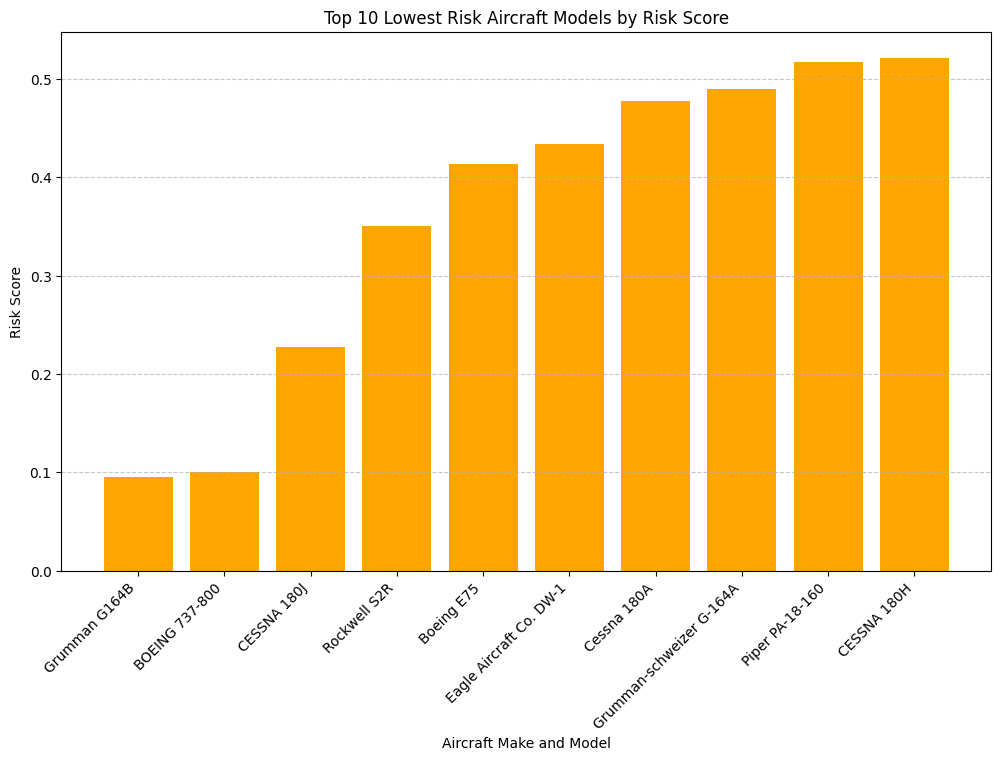

In [121]:
#Figure size
plt.figure(figsize=(12, 7)) 
#Bar Data
aircraft_labels = lowest_risk_aircraft['Make'] + ' ' + lowest_risk_aircraft['Model']
bars = plt.bar(aircraft_labels, lowest_risk_aircraft['Risk_Score'], color='Orange')

plt.xlabel('Aircraft Make and Model')
plt.ylabel('Risk Score')
plt.title('Top 10 Lowest Risk Aircraft Models by Risk Score')
plt.xticks(rotation=45, ha='right') # Rotated x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for easier reading

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()

In [118]:
# The first 10 rows (the highest risk ones).
highest_risk_aircraft = filtered_aircraft_risk.sort_values(by='Risk_Score').tail(10)

print("\n--- Top 10 Highest Risk Aircraft Models ---")
print("These are the aircraft models with the highest calculated risk scores,")
print(highest_risk_aircraft.to_string(index=False))
print(highest_risk_aircraft.head())


--- Top 10 Highest Risk Aircraft Models ---
These are the aircraft models with the highest calculated risk scores,
             Make     Model  Total_Incidents  Total_Fatal_Injuries  Total_Serious_Injuries  Total_Minor_Injuries  Fatal_Per_Incident  Serious_Per_Incident  Minor_Per_Incident  Risk_Score
     De Havilland DHC-6-300               23                  76.0                    28.0                  19.0            3.304348              1.217391            0.826087   21.000000
           Boeing   737-300               47                 167.0                    33.0                 109.0            3.553191              0.702128            2.319149   22.191489
           Boeing   747-400               24                  83.0                    43.0                  40.0            3.458333              1.791667            1.666667   24.333333
Mcdonnell Douglas   DC-9-82               31                 158.0                     6.0                  12.0            5.096774    

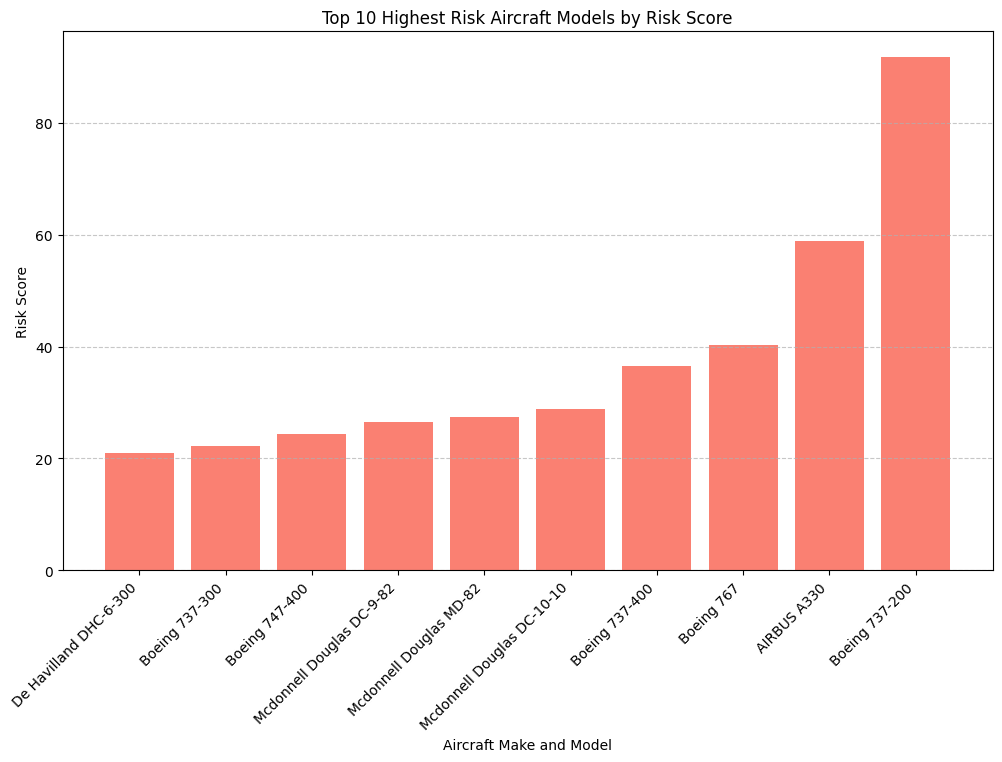

In [119]:
#Figure size
plt.figure(figsize=(12, 7)) 
#Bar Data
aircraft_labels = highest_risk_aircraft['Make'] + ' ' + highest_risk_aircraft['Model']
bars = plt.bar(aircraft_labels, highest_risk_aircraft['Risk_Score'], color='Orange')

plt.xlabel('Aircraft Make and Model')
plt.ylabel('Risk Score')
plt.title('Top 10 Highest Risk Aircraft Models by Risk Score')
plt.xticks(rotation=45, ha='right') # Rotated x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for easier reading

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()


###  Analysis: Aircraft Damage Distribution and  Flight Distribution 

In [90]:

# Count many times each type of aircraft damage occurs
damage_counts = df['Aircraft.damage'].value_counts()
print("\n--- Aircraft Damage Distribution (Overall) ---")
print(damage_counts)



--- Aircraft Damage Distribution (Overall) ---
Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         4772
Minor           2805
Name: count, dtype: int64


In [91]:
# Calculate the percentage of each damage type
damage_percentages = df['Aircraft.damage'].value_counts(normalize=True) * 100
print("\n--- Aircraft Damage Distribution (Percentage) ---")
print(damage_percentages.round(2).astype(str) + '%')


--- Aircraft Damage Distribution (Percentage) ---
Aircraft.damage
Substantial     71.0%
Destroyed      20.61%
Unknown         5.28%
Minor            3.1%
Name: proportion, dtype: object


In [92]:
# Count of incidents occurred for each purpose of flight
purpose_counts = df['Purpose.of.flight'].value_counts()
print("\n--- Purpose of Flight Distribution (Overall) ---")
print(purpose_counts)


--- Purpose of Flight Distribution (Overall) ---
Purpose.of.flight
Personal                     49448
Unknown                      14453
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: in

In [93]:
# Group by 'Purpose.of.flight' and then by 'Aircraft.damage' to see
# what kind of damage is most common for each flight purpose.
damage_by_purpose = df.groupby('Purpose.of.flight')['Aircraft.damage'].value_counts().unstack(fill_value=0)
print("\n--- Aircraft Damage Counts by Purpose of Flight ---")
print(damage_by_purpose)


--- Aircraft Damage Counts by Purpose of Flight ---
Aircraft.damage            Destroyed  Minor  Substantial  Unknown
Purpose.of.flight                                                
ASHO                               4      0            2        0
Aerial Application              1069     28         3600       15
Aerial Observation               225     12          536       21
Air Drop                           4      0            7        0
Air Race show                     20      6           64        9
Air Race/show                     20      3           33        3
Banner Tow                         9      0           92        0
Business                        1186    107         2630       95
Executive/corporate              159     33          331       30
External Load                     16      0           99        8
Ferry                            235     27          543        7
Firefighting                      15      0           23        2
Flight Test            

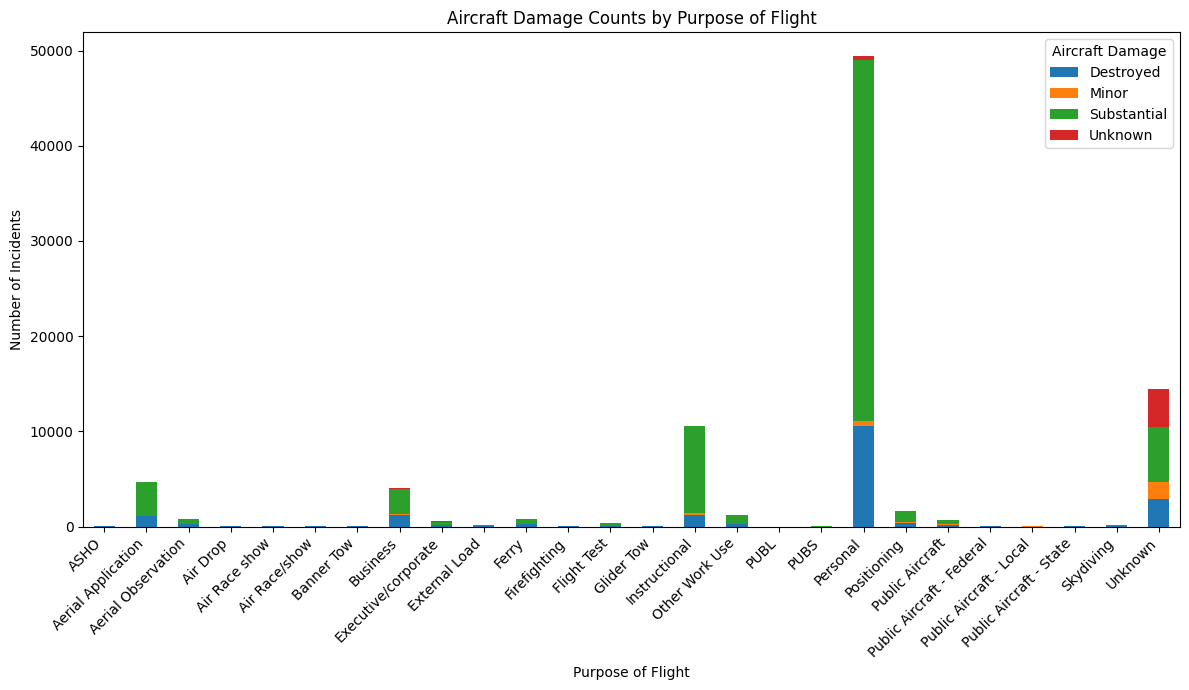

In [122]:
# Create a stacked bar plot for Aircraft Damage Counts by Purpose of Flight
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability
damage_by_purpose.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Aircraft Damage Counts by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Aircraft Damage')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


### Analysis: Broad Phase of Flight Distribution 

In [123]:
phase_counts = df['Broad.phase.of.flight'].value_counts()
print("\n--- Broad Phase of Flight Distribution (Overall) ---")
print(phase_counts)


--- Broad Phase of Flight Distribution (Overall) ---
Broad.phase.of.flight
Unknown        29172
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-Around       1353
Standing         945
Other            119
Name: count, dtype: int64


In [124]:

# Calculate the percentage of each broad phase of flight
phase_percentages = df['Broad.phase.of.flight'].value_counts(normalize=True) * 100
print("\n--- Broad Phase of Flight Distribution (Percentage) ---")
print(phase_percentages.round(2).astype(str) + '%')


--- Broad Phase of Flight Distribution (Percentage) ---
Broad.phase.of.flight
Unknown        32.29%
Landing        17.08%
Takeoff        13.83%
Cruise         11.37%
Maneuvering     9.01%
Approach        7.25%
Climb           2.25%
Taxi            2.17%
Descent         2.09%
Go-Around        1.5%
Standing        1.05%
Other           0.13%
Name: proportion, dtype: object


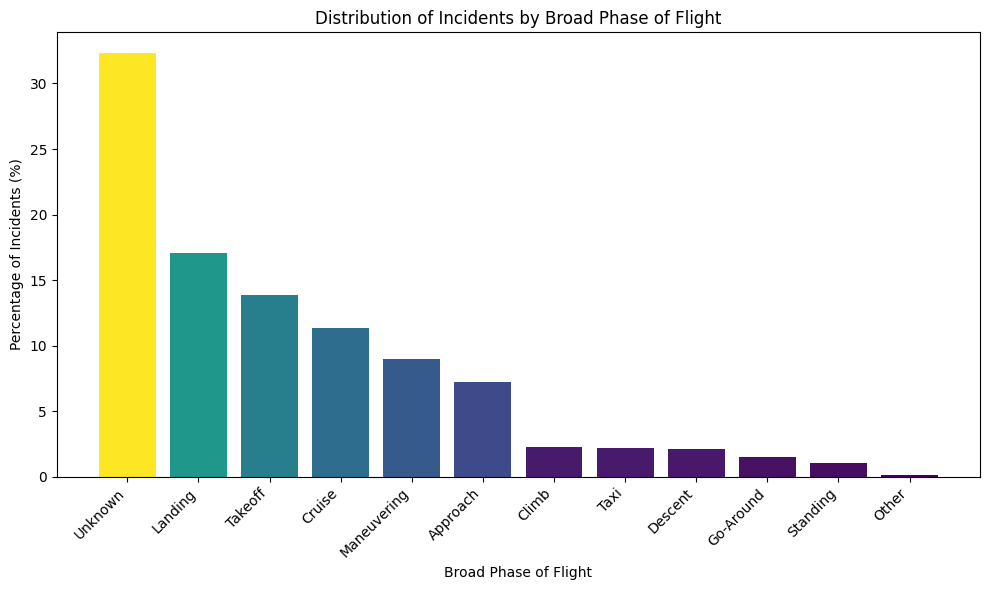

In [125]:
# Bar Chart Flight Distribution using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(x=phase_percentages.index, height=phase_percentages.values, color=plt.cm.viridis(phase_percentages.values / max(phase_percentages.values))) # Using colormap for basic color variation
plt.title('Distribution of Incidents by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Percentage of Incidents (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
